# Topic Modeling: Top2Vec

Top2Vec is a technique for representing text documents as numerical vectors in a high-dimensional space, with the goal of capturing the main topics or themes present in the document. It is based on the idea of creating a dense vector representation of a document by aggregating the vectors of its individual words, which are themselves obtained through a process called word embedding.

Top2Vec combines the idea of word embedding with that of topic modeling, a technique for identifying the main themes or topics present in a collection of documents. It does this by training a model to predict the distribution of topics in a document given its word embeddings, and then using this trained model to generate a dense vector representation of the document based on the predicted topic distribution.

Top2Vec has been used in a number of natural language processing tasks, including document classification, text summarization, and content recommendation. It has been shown to be effective in capturing the main themes or topics present in a document and representing them in a numerical form that can be used as input to other machine learning models.

At a high level, the algorithm performs the following steps to discover topics in a list of documents.
- Generate embedding vectors for documents and words.
- Perform dimensionality reduction on the vectors using an algorithm such as UMAP.
- Cluster the vectors using a clustering algorithm such as HDBSCAN.
- Assign topics to each cluster.

In [1]:
# Load required packages
import numpy as np
import pandas as pd
from top2vec import Top2Vec

import plotly.express as px
import plotly.io as pio
svg_renderer = pio.renderers["svg"]
pio.renderers.default = "svg"

In [2]:
# Load the data
df = pd.read_hdf('./../../code/data/starbucks/data.h5', key='preprocessed_starbucks')

In [3]:
# Store only the required tweets
docs = df['preprocessed_tweet'].values.tolist()

Since Top2vec is capable of utilizing deep learning based custom embeddings, the embeddings that will be used in the project is "all-MiniLM-L6-v2". It is an all-round model tuned for many use-cases which are trained on a large and diverse dataset of over 1 billion training pairs.

In [4]:
# Fit the model
model = Top2Vec(docs, ngram_vocab=True, embedding_model='all-MiniLM-L6-v2', workers=8)

2022-12-16 23:05:11,427 - top2vec - INFO - Pre-processing documents for training
/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

2022-12-16 23:05:11,508 - top2vec - INFO - Downloading all-MiniLM-L6-v2 model
2022-12-16 23:05:11,977 - top2vec - INFO - Creating joint document/word embedding
2022-12-16 23:06:02,758 - top2vec - INFO - Creating lower dimension embedding of documents
2022-12-16 23:06:15,063 - top2vec - INFO - Finding dense areas of documents
2022-12-16 23:06:15,157 - top2vec - INFO - Finding topics


In [5]:
# Get the number of topics
model.get_num_topics()

2

In [6]:
# Frame the results
topic_sizes, topic_nums = model.get_topic_sizes()
topic_words = model.topic_words
model_results = pd.DataFrame({
    'Topic_number': topic_nums,
    'Topic_count': topic_sizes,
})

model_results['Topic_words'] = None
for i, row in model_results.iterrows():
    words_list = ", ".join(topic_words[i])
    model_results.at[i, 'Topic_words'] = words_list

model_results

,Topic_number,Topic_count,Topic_words
0,0,2593,"customer, holiday drink, barista yell, work, d..."
1,1,177,"good, right, lol, new, look, want, customer, l..."


In [7]:
# Get the sample documents for each topic
topics_df = []

for topic_num in range(model.get_num_topics()):
    tmp = pd.DataFrame(model.search_documents_by_topic(0, num_docs=10)).T
    tmp.columns = ['Tweet text', 'Topic confidence', 'index']
    tmp['Topic number'] = topic_num
    topics_df.append(tmp)

topics_df = pd.concat(topics_df, axis=0)
topics_df

,Tweet text,Topic confidence,index,Topic number
0,use reward yesterday grande shake brown sugar ...,0.611833,713,0
1,today isfor home buy drink onthego local chain...,0.599895,1142,0
2,ugh doordash 8 drink literally 17 lmfaooo send...,0.580481,2557,0
3,work tomorrow afford usual ill coffeei need ma...,0.574859,1806,0
4,y emmet barista yell taste yess s start play p...,0.570993,2380,0
5,buy morning lollll,0.566577,100,0
6,funny cos pay start coffeeif know d think,0.566567,1956,0
7,omw buy little drink,0.562152,2350,0
8,y bad business barista yell good song email se...,0.560717,834,0
9,englewood ohio grande hot caramel mochiotto mo...,0.560117,935,0


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


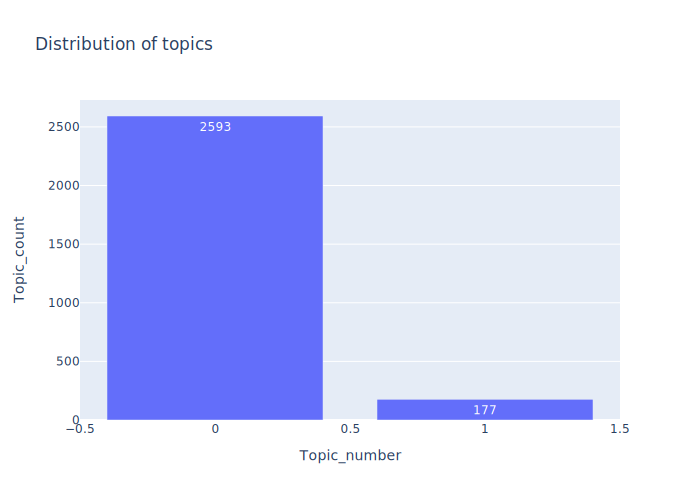

In [8]:
fig = px.bar(model_results, x='Topic_number', y='Topic_count', title="Distribution of topics", text_auto=True)
fig.show()

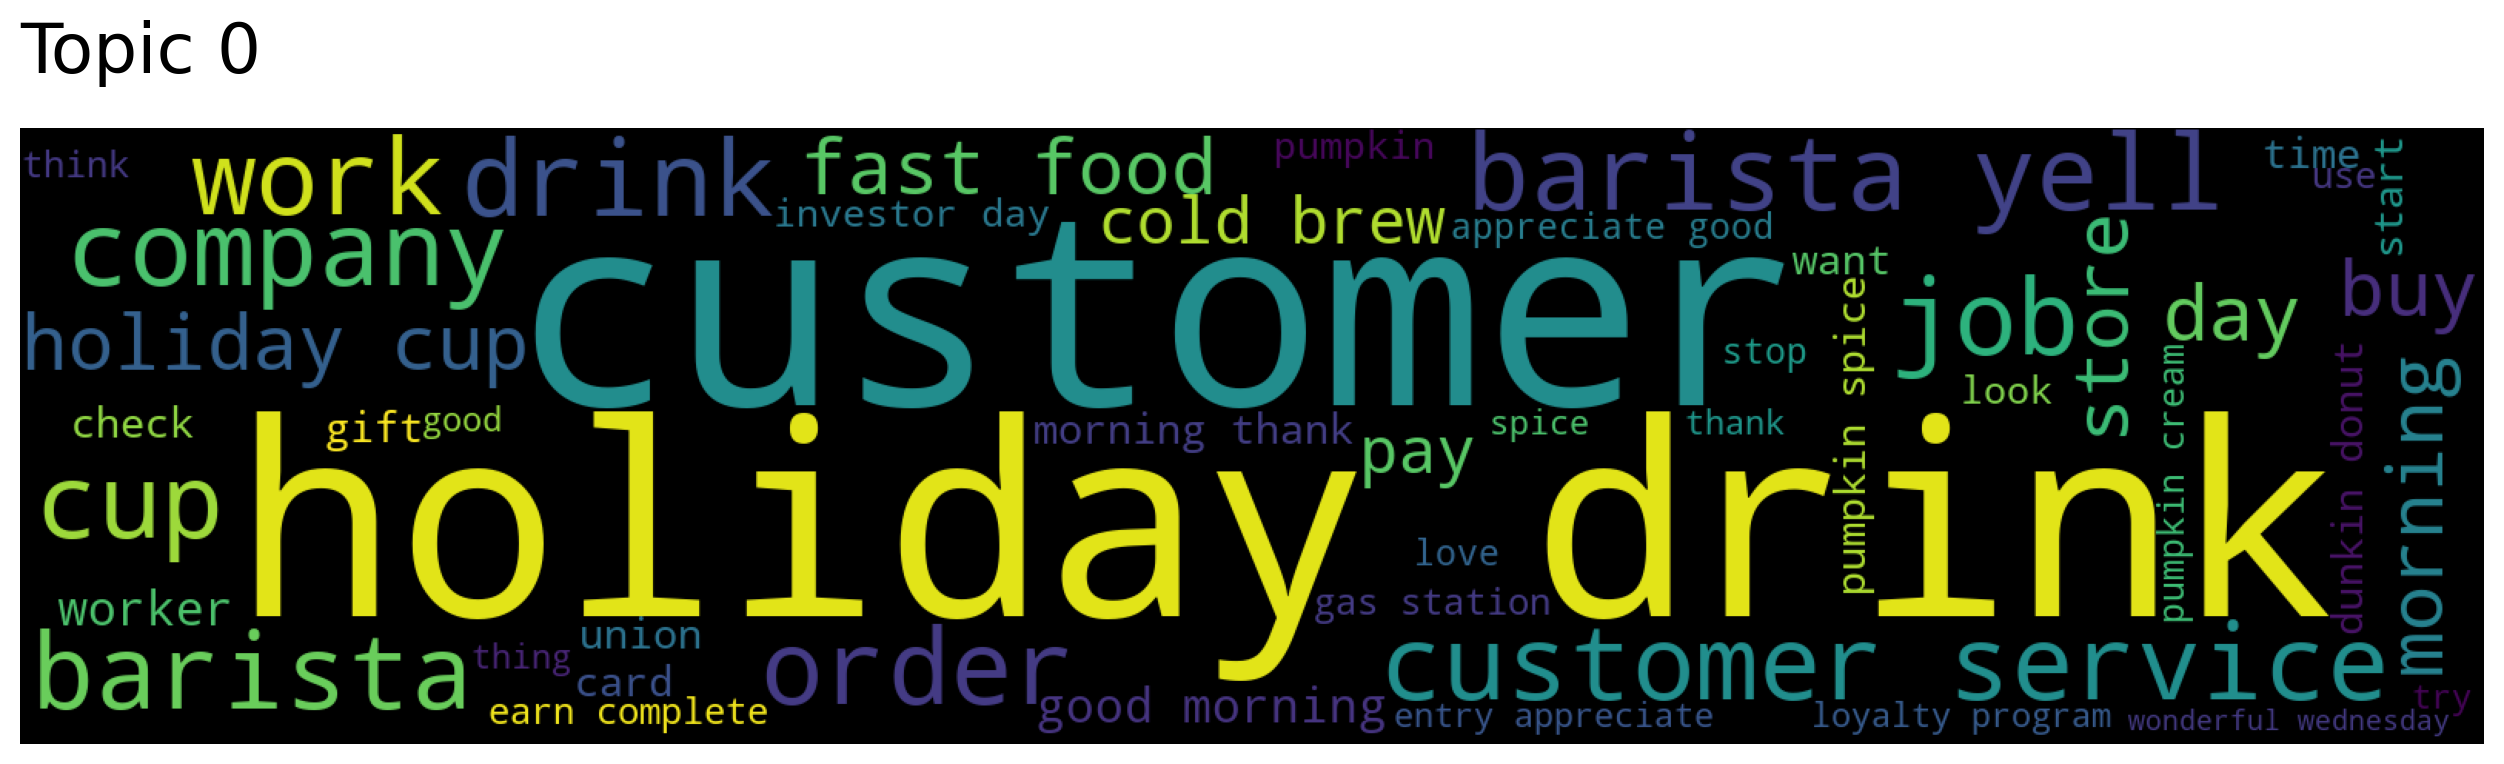

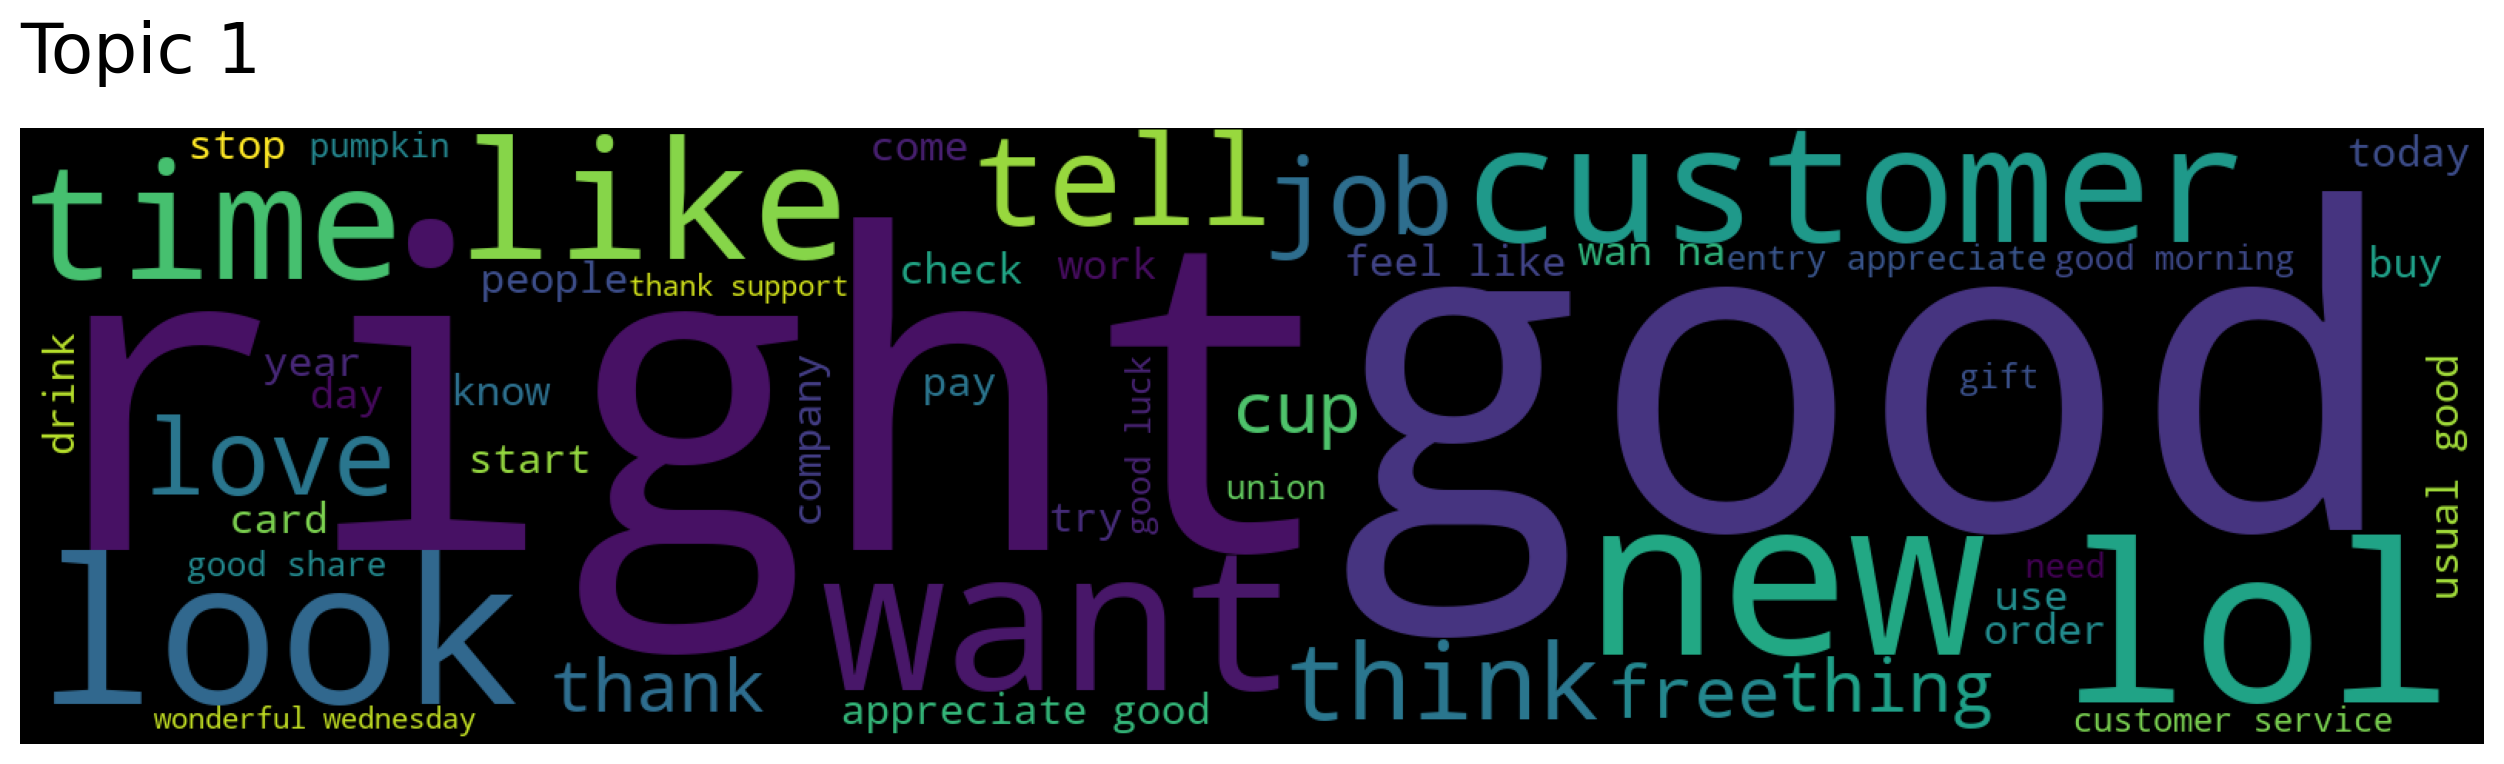

In [9]:
for topic_num in range(model.get_num_topics()):
    model.generate_topic_wordcloud(topic_num)

From the above wordclouds, it can be inferred that:
- The first topic is mostly related to special drinks that are offered by Starbucks.
- The second topic is related to the appreciation of the company's products.